<a href="https://colab.research.google.com/github/Chirag314/Feature-Engineering/blob/main/Feature_Engineering_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about practicing feature engineering from book'Python Feature Engineering Cookbook'

Download titanic data.

In [1]:
import numpy as np
import pandas as pd

def get_first_cabin(row):
  try:
    return row.split()[0]
  except:
    return np.nan
url="https://www.openml.org/data/get_csv/16826755/phpMYEkMl"
data=pd.read_csv(url)
data=data.replace('?',np.nan)
data['cabin']=data['cabin'].apply(get_first_cabin)
data.to_csv('titanic.csv',index=False)

In [2]:
#Check all data types of Titanic data
import matplotlib.pyplot as plt
data=pd.read_csv('titanic.csv')
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [3]:
data['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [5]:
#lets check first few values of variable 'fare'
data['fare'].unique()[0:20]

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333])

In [6]:
#Also check 'embark' and 'cabin' variables
data['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [7]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


<Axes: >

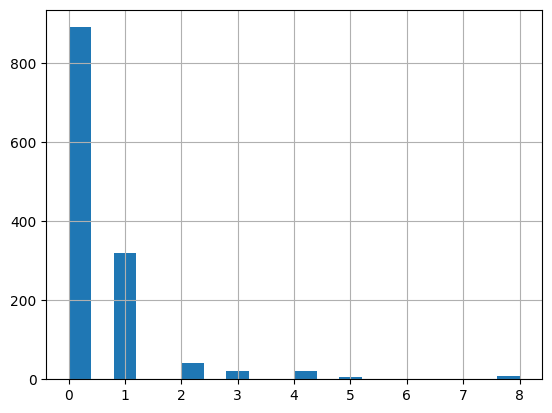

In [8]:
#Check 'sibsp' varible using histogram
data['sibsp'].hist(bins=20)

<Axes: >

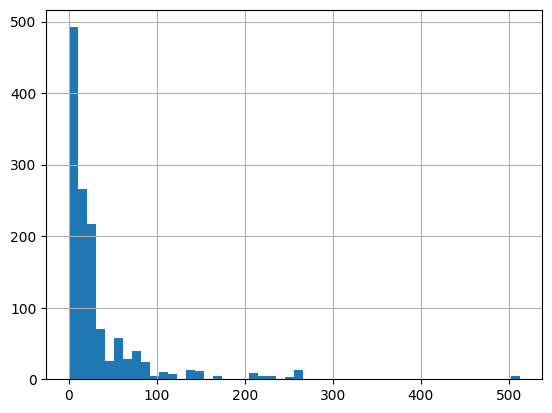

In [9]:
#Check 'fare' variable
data['fare'].hist(bins=50)

Check KDD data

In [17]:
cols=['AGE' ,'NUMCHLD', 'INCOME','WEALTH1','MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML' ,'MAGFEM','MAGMALE']
data=pd.read_csv('cup98LRN.txt',usecols=cols)
data.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [21]:
#CHECK MISSING DATA
print(data.shape)
data.isnull().sum()

(13659, 11)


AGE          3423
NUMCHLD     11886
INCOME       3034
WEALTH1      6362
MBCRAFT      7572
MBGARDEN     7572
MBBOOKS      7572
MBCOLECT     7583
MAGFAML      7572
MAGFEM       7572
MAGMALE      7572
dtype: int64

All variables have lot of missing values, 'NUMCHLD' has 80 % of missing values.

In [22]:
data.isnull().mean()

AGE         0.250604
NUMCHLD     0.870195
INCOME      0.222125
WEALTH1     0.465773
MBCRAFT     0.554360
MBGARDEN    0.554360
MBBOOKS     0.554360
MBCOLECT    0.555165
MAGFAML     0.554360
MAGFEM      0.554360
MAGMALE     0.554360
dtype: float64

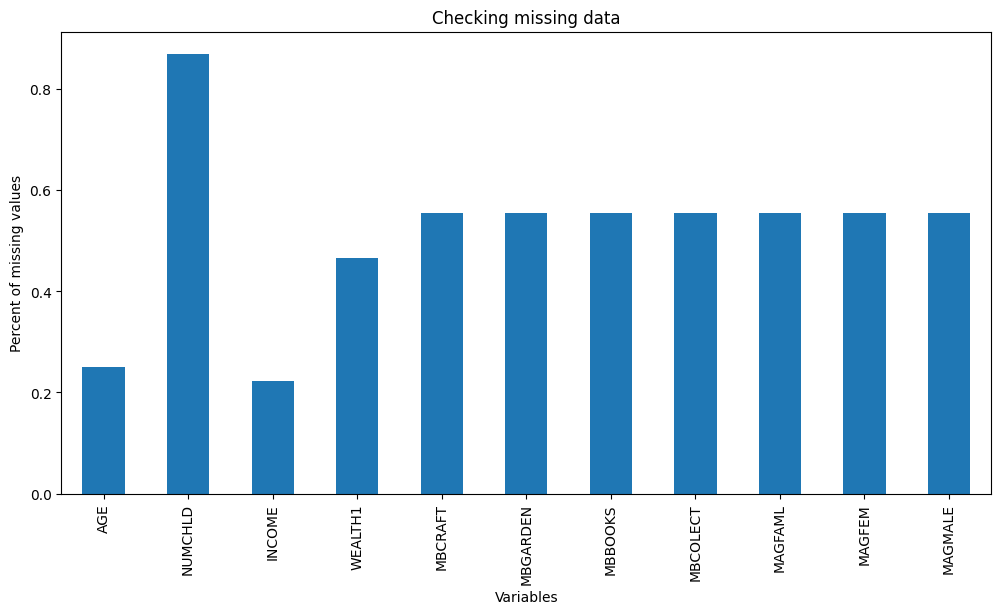

In [23]:
#draw histogram of percent missisng values
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percent of missing values')
plt.xlabel('Variables')
plt.title('Checking missing data')
plt.show()